In [1]:
from util.VisualizeDataset import VisualizeDataset
from Chapter4.TemporalAbstraction import NumericalAbstraction
from Chapter4.TemporalAbstraction import CategoricalAbstraction
from Chapter4.FrequencyAbstraction import FourierTransformation
from Chapter4.TextAbstraction import TextAbstraction
import copy
import pandas as pd


C:\Users\zdujmic\AppData\Local\Continuum\Anaconda2\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [2]:

# Let us create our visualization class again.
DataViz = VisualizeDataset()

# Read the result from the previous chapter, and make sure the index is of the type datetime.
dataset_path = './intermediate_datafiles/'
try:
    dataset = pd.read_csv(dataset_path + 'chapter3_result_final.csv', index_col=0)
except IOError as e:
    print('File not found, try to run previous crowdsignals scripts first!')
    raise e

dataset.index = dataset.index.to_datetime()

# Compute the number of milliseconds covered by an instane based on the first two rows
milliseconds_per_instance = (dataset.index[1] - dataset.index[0]).microseconds/1000



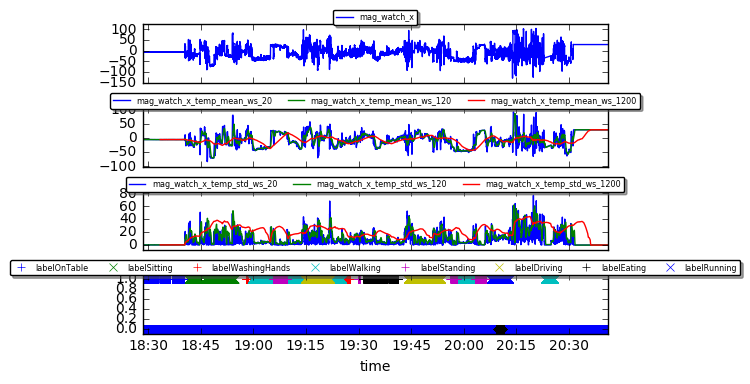

In [3]:
# First we focus on the time domain.

# Set the window sizes to the number of instances representing 5 seconds, 30 seconds and 5 minutes
window_sizes = [int(float(5000)/milliseconds_per_instance), int(float(0.5*60000)/milliseconds_per_instance), int(float(5*60000)/milliseconds_per_instance)]

NumAbs = NumericalAbstraction()
dataset_copy = copy.deepcopy(dataset)
for ws in window_sizes:
    dataset_copy = NumAbs.abstract_numerical(dataset_copy, ['mag_watch_x'], ws, 'mean')
    dataset_copy = NumAbs.abstract_numerical(dataset_copy, ['mag_watch_x'], ws, 'std')

DataViz.plot_dataset(dataset_copy, ['mag_watch_x', 'mag_watch_x_temp_mean', 'mag_watch_x_temp_std', 'label'], ['exact', 'like', 'like', 'like'], ['line', 'line', 'line', 'points'])


In [ ]:
ws = int(float(0.5*60000)/milliseconds_per_instance)
selected_predictor_cols = [c for c in dataset.columns if not 'label' in c]
dataset = NumAbs.abstract_numerical(dataset, selected_predictor_cols, ws, 'mean')
dataset = NumAbs.abstract_numerical(dataset, selected_predictor_cols, ws, 'std')


CatAbs = CategoricalAbstraction()
dataset = CatAbs.abstract_categorical(dataset, ['label'], ['like'], 0.03, int(float(5*60000)/milliseconds_per_instance), 2)


In [5]:
# Now we move to the frequency domain, with the same window size.

FreqAbs = FourierTransformation()
fs = float(1000)/milliseconds_per_instance

periodic_predictor_cols = ['acc_phone_x','acc_phone_y','acc_phone_z','acc_watch_x','acc_watch_y','acc_watch_z','gyr_phone_x','gyr_phone_y',
                           'gyr_phone_z','gyr_watch_x','gyr_watch_y','gyr_watch_z','mag_phone_x','mag_phone_y','mag_phone_z',
                           'mag_watch_x','mag_watch_y','mag_watch_z']
data_table = FreqAbs.abstract_frequency(copy.deepcopy(dataset), ['mag_watch_x'], int(float(10000)/milliseconds_per_instance), fs)

# Spectral analysis.

DataViz.plot_dataset(data_table, ['mag_watch_x_max_freq', 'mag_watch_x_freq_weighted', 'mag_watch_x_pse', 'label'], ['like', 'like', 'like', 'like'], ['line', 'line', 'line','points'])


KeyboardInterrupt: 

In [6]:

dataset = FreqAbs.abstract_frequency(dataset, periodic_predictor_cols, int(float(10000)/milliseconds_per_instance), fs)

# Now we only take a certain percentage of overlap in the windows, otherwise our training examples will be too much alike.

# The percentage of overlap we allow
window_overlap = 0.9
skip_points = int((1-window_overlap) * ws)
dataset = dataset.iloc[::skip_points,:]


dataset.to_csv(dataset_path + 'chapter4_result.csv')

DataViz.plot_dataset(dataset, ['acc_phone_x', 'gyr_phone_x', 'hr_watch_rate', 'light_phone_lux', 'mag_phone_x', 'press_phone_', 'pca_1', 'label'], ['like', 'like', 'like', 'like', 'like', 'like', 'like','like'], ['line', 'line', 'line', 'line', 'line', 'line', 'line', 'points'])


KeyboardInterrupt: 